# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = \frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(x^TA^TAx-2y^TAx+y^Ty) $$
$$ \nabla f(x) = 2A^TAx-2A^T = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y) = 0 $$
$$ x = (A^TA)^{-1}A^Ty $$

### 2.1 Реализация прямого решения

In [2]:
import numpy as np
import matplotlib.pyplot as plt

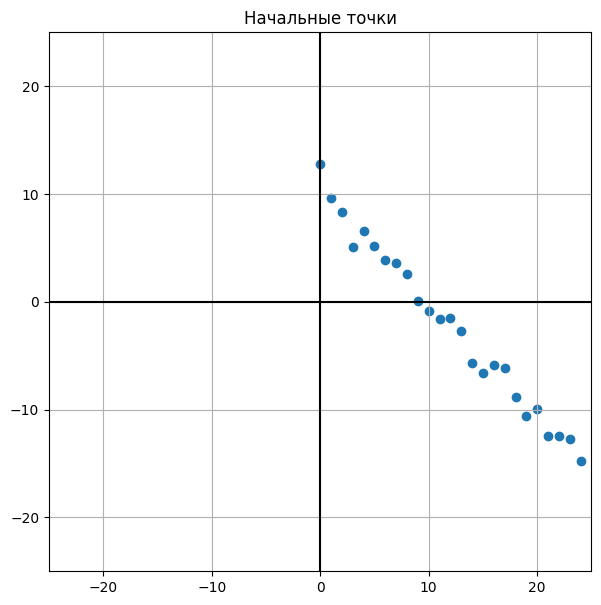

In [29]:
# ваши параметры по вариантам
a_orig = -1.1 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = 11 # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 11 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)
ax.set_title("Начальные точки")

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [6]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 12.74945474,   9.613927  ,   8.31543487,   5.04668144,
          6.59171537,   5.18036864,   3.86337064,   3.61540267,
          2.62105072,   0.03439702,  -0.88623967,  -1.57573349,
         -1.51031769,  -2.73880782,  -5.70554851,  -6.61947526,
         -5.86316261,  -6.12536593,  -8.83107509, -10.58344663,
         -9.9043703 , -12.40957664, -12.47424778, -12.75092837,
        -14.76992018]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - чтобы учесть свободный член b в уравнении линейной регрессии. Без нее все данные были бы около нуля, т.е. столбец едениц дает смещение на b линии а не только ее наклон.

In [28]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
print("Аналитическое решение:", a_b_analytical)

Аналитическое решение: [-1.05625779 10.47043698]


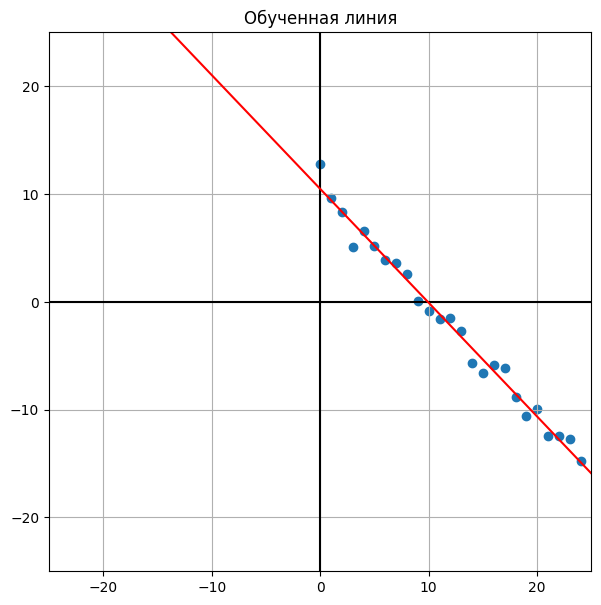

In [31]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_title("Обученная линия")
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
ax.plot([-25, 25], a_b_analytical[0] * np.array([-25, 25]) + a_b_analytical[1], color="red")

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

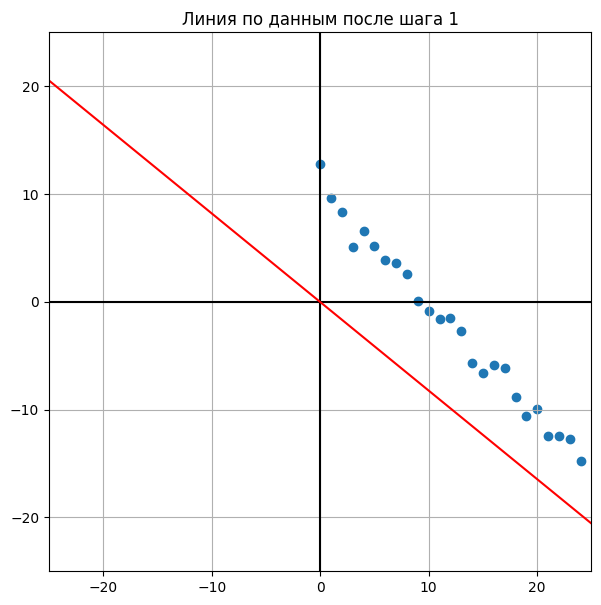

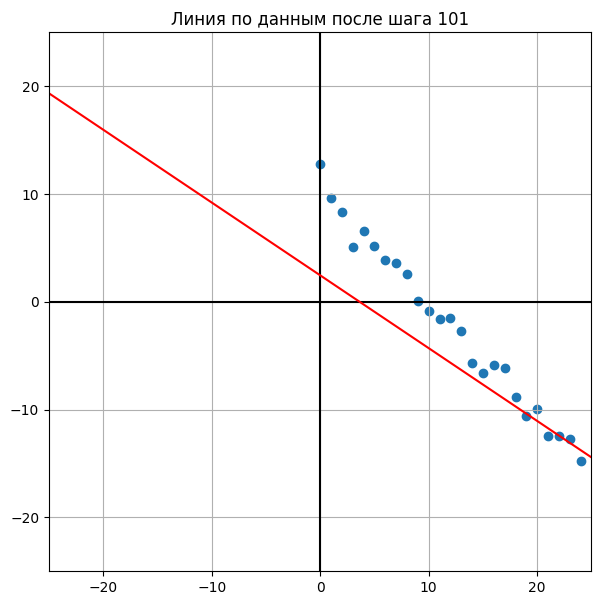

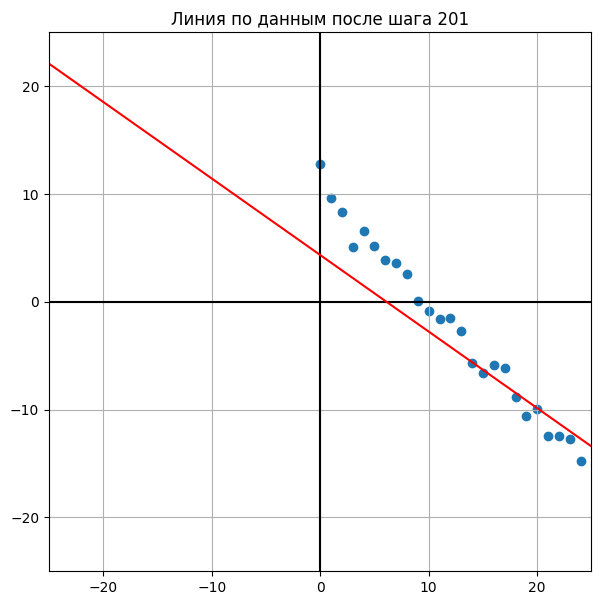

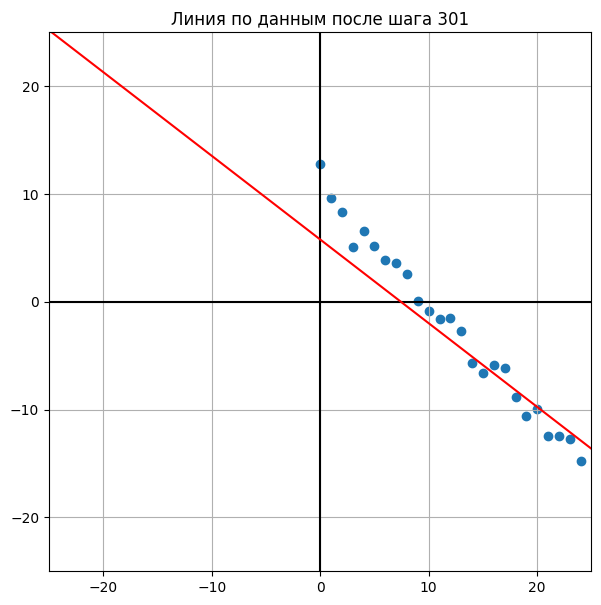

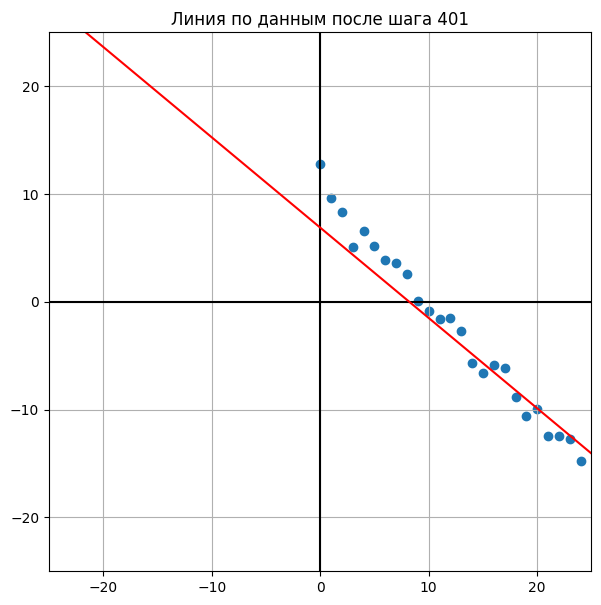

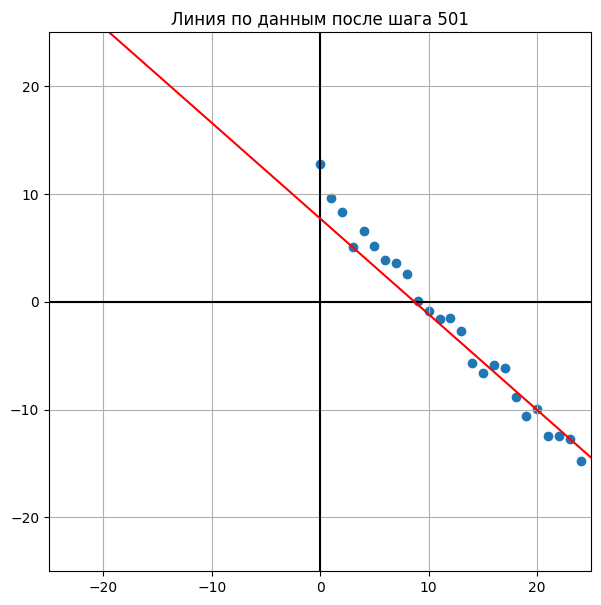

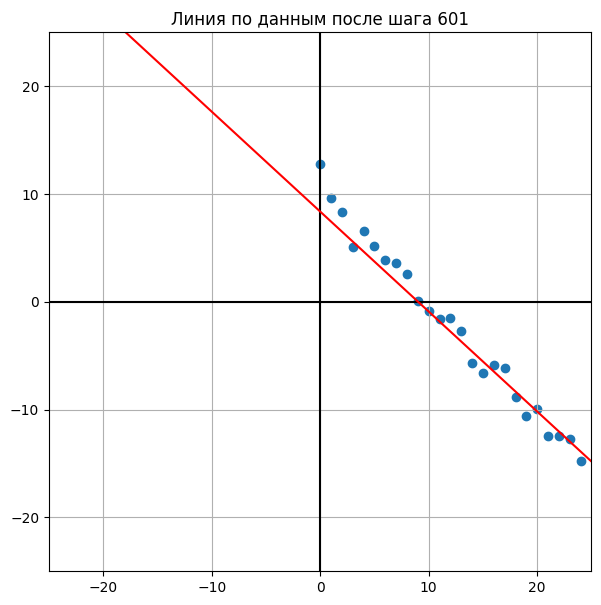

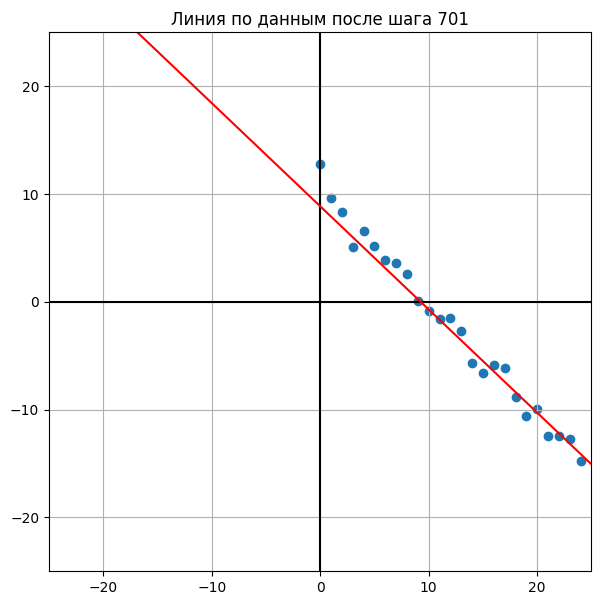

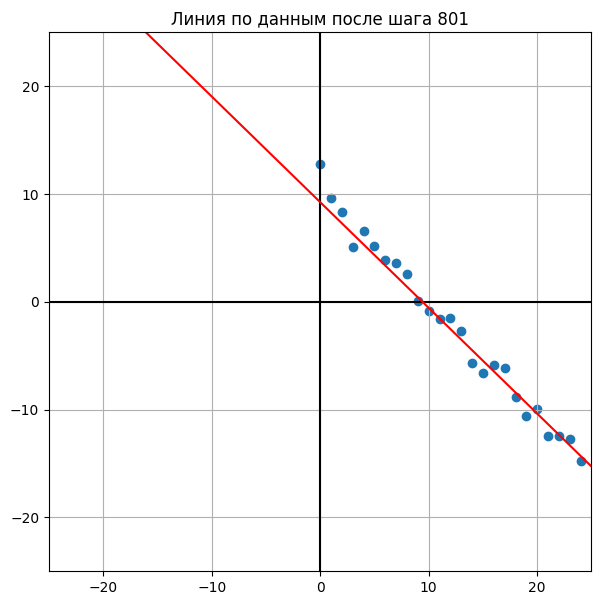

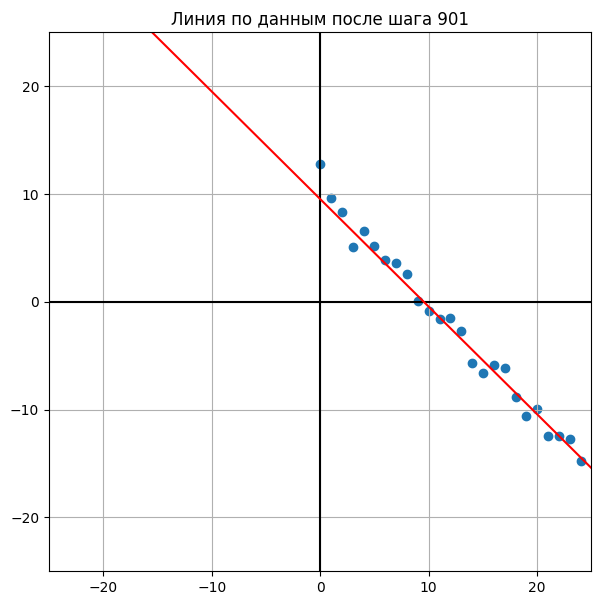

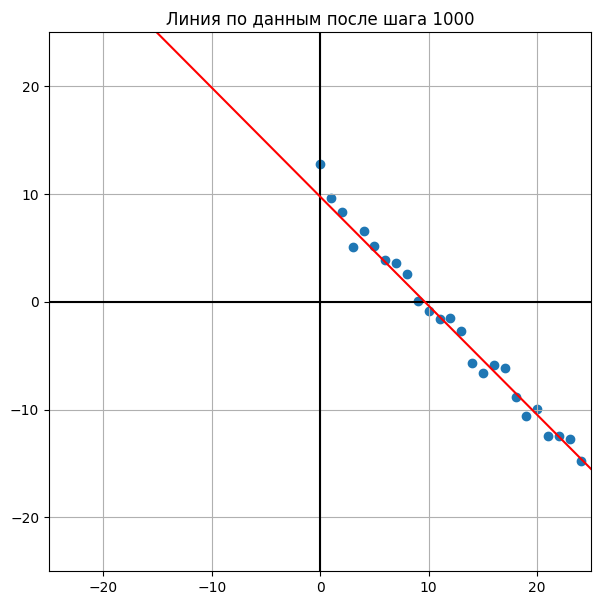

In [32]:
alpha = 0.000202
iterations = 1000

a_b_analytical = np.array([0., 0.])

for i in range(iterations):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b_analytical - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b_analytical += alpha * antigrad
    
    # рисуем результат текущего шага
    
    if i % 100 == 0 or i == 999:
        #  - изначальные данные
        f, ax = plt.subplots(figsize=(7, 7))

        plt.scatter(A[:, 0], y)
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axvline(0, color='black')
        ax.axhline(0, color='black')
        ax.grid(True)

        # - линия которая обучилась
        ax.plot([-25, 25], a_b_analytical[0]*np.array([-25, 25]) + a_b_analytical[1], color="red")
        ax.set_title(f'Линия по данным после шага {i+1}')
        plt.show()